In [1]:
import time
from math import *
import numpy as np
from scipy import special
from scipy.integrate import quad
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data = np.loadtxt('ACH.dat')

In [3]:
Lbox = 1100
hLbox = Lbox/2

Nt = 110000
nbar = Nt / Lbox**3

nk = 9
fbasis = np.zeros(nk)

nr = 21
rmin = 60
rmax = 120
rmid = (rmax+rmin)/2
mu = rmid
sigma = 4.6

In [4]:
sample = np.random.choice(len(data),size=Nt,replace=False)

In [5]:
x, y, z = data[sample].T

In [6]:
def E1(s):
    return special.erf(s/sqrt(2))

def E2(s):
    return sqrt(2/pi)*np.exp(-s**2/2)

def f1(s):
    return (s+1/s) * E1(s) + E2(s)

def f2(s):
    return 3 + s**2

def f3(s):
    return (s**3+6*s+3/s) * E1(s) + (s**2+5) * E2(s)

def f4(s):
    return s**4+10*s**2+15

def f5(s):
    return (s**5+15*s**3+45*s+15/s) * E1(s) + (s**2+3)*(s**2+11) * E2(s)

def f6(s):
    return s**6 + 21*s**4 + 105*s**2 + 105

def f7(s):
    return (s**7+28*s**5+210*s**3+420*s+105/s)* E1(s) + (s**6+27*s**4+185*s**2+279)*E2(s)

def f8(s):
    return s**8 + 36*s**6 + 378*s**4 + 1260*s**2 + 945

def f9(s):
    return (s**9+45*s**7+630*s**5+3150*s**3+4725*s+945/s)*E1(s) + (s**8+44*s**6+588*s**4+2640*s**2+2895)*sqrt(2/pi)*E2(s)
    
#def f1(s):
#    return ((s/sigma)+1/((s/sigma))) * special.erf((s/sigma)/sqrt(2)) + sqrt(2/pi)*np.exp(-(s/sigma)**2/2)

#def f2(s):
#    return 3 + (s/sigma)**2

#def f3(s):
#    return ((s/sigma)**3+6*(s/sigma)+3/(s/sigma)) * special.erf((s/sigma)/sqrt(2)) + ((s/sigma)**2+5) * sqrt(2/pi)*np.exp(-(s/sigma)**2/2)

#def f4(s):
#    return (s/sigma)**4+10*(s/sigma)**2+15

#def f5(s):
#    return ((s/sigma)**5+15*(s/sigma)**3+45*(s/sigma)+15/(s/sigma)) * special.erf((s/sigma)/sqrt(2)) + ((s/sigma)**2+5) + ((s/sigma)**2+3)*((s/sigma)**2+11) * sqrt(2/pi)*np.exp(-(s/sigma)**2/2)

#def f6(s):
#    return (s/sigma)**6 + 21*(s/sigma)**4 + 105*(s/sigma)**2 + 105

#def f7(s):
#    return ((s/sigma)**7+28*(s/sigma)**5+210*s**3+420*(s/sigma)+105/(s/sigma))* special.erf((s/sigma)/sqrt(2)) + ((s/sigma)**6+27*(s/sigma)**4+185*(s/sigma)**2+279)*sqrt(2/pi)*np.exp(-(s/sigma)**2/2)

#def f8(s):
#    return (s/sigma)**8 + 36*(s/sigma)**6 + 378*(s/sigma)**4 + 1260*(s/sigma)**2 + 945

#def f9(s):
#    return ((s/sigma)**9+45*(s/sigma)**7+630*(s/sigma)**5+3150*(s/sigma)**3+4725*(s/sigma)+945/(s/sigma))*special.erf((s/sigma)/sqrt(2)) + ((s/sigma)**8+44*(s/sigma)**6+588*(s/sigma)**4+2640*(s/sigma)**2+2895)*sqrt(2/pi)*np.exp(-(s/sigma)**2/2)


In [7]:
f = [f1,f2,f3,f4,f5,f6,f7,f8,f9]

In [8]:
t0 = time.time()

Nb = np.zeros(nr)

for i in tqdm(range(Nt-1)):
    j = np.arange(i+1,Nt)
    
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dz = z[i] - z[j]
        
    ### periodic boundary conditions on separations: 
    dx[np.where(dx>hLbox)] -= Lbox
    dy[np.where(dy>hLbox)] -= Lbox
    dz[np.where(dz>hLbox)] -= Lbox
    dx[np.where(dx<-hLbox)] += Lbox
    dy[np.where(dy<-hLbox)] += Lbox
    dz[np.where(dz<-hLbox)] += Lbox

    r2 = dx**2 + dy**2 + dz**2
    r = np.sqrt(r2)
    
    ### Laguerre pair counts:
    r = r[(r>=rmin) & (r<=rmax)]
    if len(r) > 0:
        s = r/sigma
        for k in range(nk):
            fbasis[k] += np.sum(f[k](s))/Nt
        #E1 = special.erf(s/sqrt(2))
        #E2 = sqrt(2/pi)*np.exp(-s**2/2)
        #fbasis[0] += sum((s+1/s) * E1 + E2)/Nt
        #fbasis[1] += sum(3 + s**2)/Nt
        #fbasis[2] += sum((s**3+6*s+3/s) * E1 + (s**2+5) * E2)/Nt
        #fbasis[3] += sum(s**4+10*s**2+15)/Nt
        #fbasis[4] += sum((s**5+15*s**3+45*s+15/s) * E1 + (s**2+3)*(s**2+11) * E2)/Nt
        #fbasis[5] += sum(s**6 + 21*s**4 + 105*s**2 + 105)/Nt
        #fbasis[6] += sum((s**7+28*s**5+210*s**3+420*s+105/s)*E1 + (s**6+27*s**4+185*s**2+279)*E2)/Nt
        #fbasis[7] += sum(s**8 + 36*s**6 + 378*s**4 + 1260*s**2 + 945)/Nt
        #fbasis[8] += sum((s**9+45*s**7+630*s**5+3150*s**3+4725*s+945/s)*E1 + (s**8+44*s**6+588*s**4+2640*s**2+2895)*E2)/Nt
    
        
fbasis = fbasis*2 / (Nt-1)
    

t1 = time.time() 
print('Time =', t1-t0)

100%|██████████| 109999/109999 [05:31<00:00, 331.71it/s] 

Time = 331.61658668518066


In [9]:
V = np.zeros(nk)
for k in range(nk):
    fun = lambda r: r**2 * f[k](r/sigma)
    #func = lambda s: s**2 * f[k](s) 
    V[k] = quad(fun,rmin, rmax)[0]

    
nuRR = 4*pi/Lbox**3*V[0:nk]

In [10]:
dim = (nk, nk)
FRR = np.zeros(dim)
for k in range(nk):
    for l in range(k,nk):
        func = lambda r: r**2 * f[k](r/sigma) * f[l](r/sigma)
        #func = lambda s: s**2 * f[k](s) * f[l](s)
        FRR[k,l] = (4*pi/Lbox**3)*quad(func, rmin, rmax)[0]
        FRR[l,k] = FRR[k,l]

In [11]:
invF = np.linalg.inv(FRR)

In [12]:
nuDD = fbasis
simDiff = nuDD - nuRR
aSim = np.dot(invF, simDiff)
print ('Sim:', aSim)
checkDiff = 0*simDiff
for k in range(0,nk):
    checkDiff[k] = sum(FRR[k,:]*aSim[:])

Sim: [-2.04157944e+02  8.72214966e+01 -1.61332593e+01  1.68693405e+00
 -1.09075842e-01  4.46729024e-03 -1.13212374e-04  1.62369764e-06
 -1.00934396e-08]


In [13]:
nuDD

array([1.00454849e-01, 2.17515352e+00, 4.83249781e+01, 1.09706472e+03,
       2.53599790e+04, 5.95200839e+05, 1.41500154e+07, 3.40103593e+08,
       8.25224406e+09])

In [14]:
nuRR

array([9.99839113e-02, 2.16539251e+00, 4.81168675e+01, 1.09252200e+03,
       2.52588557e+04, 5.92912484e+05, 1.40975040e+07, 3.38884042e+08,
       8.22362166e+09])

In [15]:
nuDD/nuRR

array([1.00471014, 1.00450773, 1.00432511, 1.00415802, 1.00400348,
       1.00385951, 1.00372487, 1.00359873, 1.00348051])

In [16]:
rt = np.arange(60,121)
yt = rt/sigma
xiSim = 0.0*rt
for k in range(nk):
    xiSim += aSim[k] * f[k](yt)
#E1 = special.erf(yt/sqrt(2))
#E2 = sqrt(2/pi)*np.exp(-yt**2/2)
#xiSim = 0.0*rt
#xiSim = xiSim + aSim[0] * ((yt+1/yt) * E1 + E2) \
#              + aSim[1] * (3 + yt**2) \
#              + aSim[2] * ((yt**3+6*yt+3/yt) * E1 + (yt**2+5) * E2) \
#              + aSim[3] * (yt**4+10*yt**2+15) \
#                + aSim[4] * ((yt**5+15*yt**3+45*yt+15/yt) * E1 + (yt**2+3)*(yt**2+11) * E2) \
#                + aSim[5] * (yt**6 + 21*yt**4 + 105*yt**2 + 105) \
#                + aSim[6] * ((yt**7+28*yt**5+210*yt**3+420*yt+105/yt)*E1 + (yt**6+27*yt**4+185*yt**2+279)*E2) \
#                + aSim[7] * (yt**8 + 36*yt**6 + 378*yt**4 + 1260*yt**2 + 945) \
#                + aSim[8] * ((yt**9+45*yt**7+630*yt**5+3150*yt**3+4725*yt+945/yt)*E1 + (yt**8+44*yt**6+588*yt**4+2640*yt**2+2895)*E2)                    

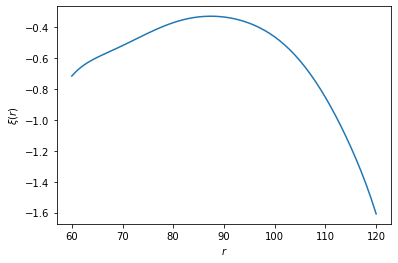

In [17]:
plt.plot(rt,xiSim)
plt.xlabel(r'$r$')
plt.ylabel(r'$\xi(r)$')
plt.show()

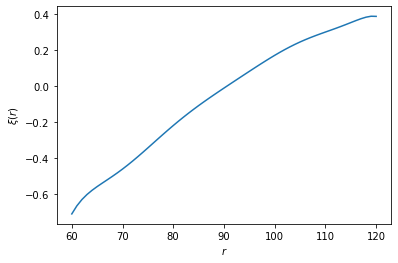

In [27]:
plt.plot(rt,xiSim)
plt.xlabel(r'$r$')
plt.ylabel(r'$\xi(r)$')
plt.show()

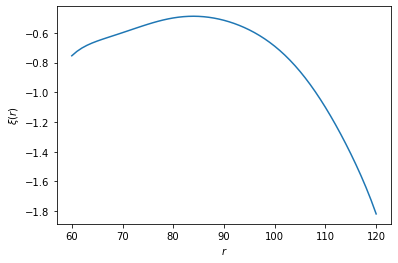

In [17]:
plt.plot(rt,xiSim)
plt.xlabel(r'$r$')
plt.ylabel(r'$\xi(r)$')
plt.show()